In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Survival Count 

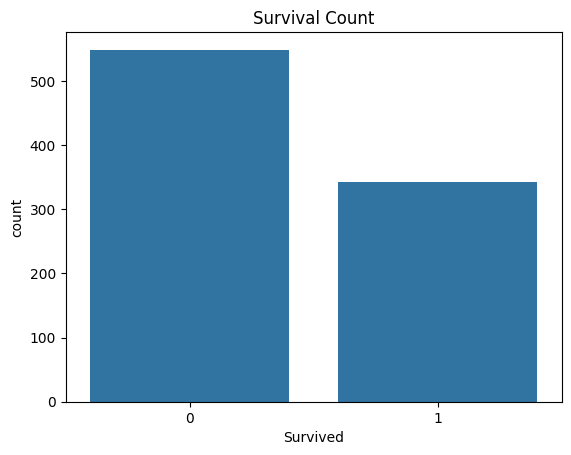

In [8]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

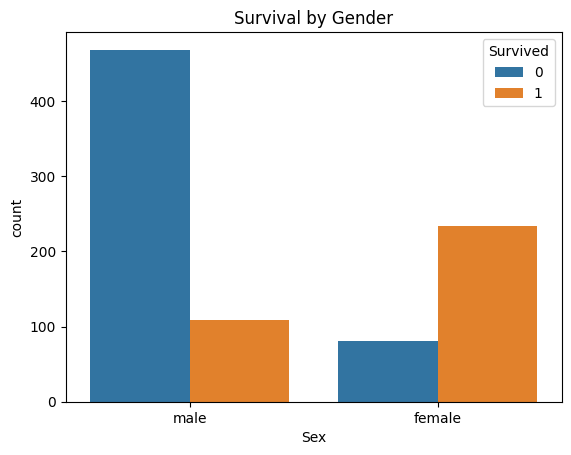

In [9]:
# 2. Survival vs Gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

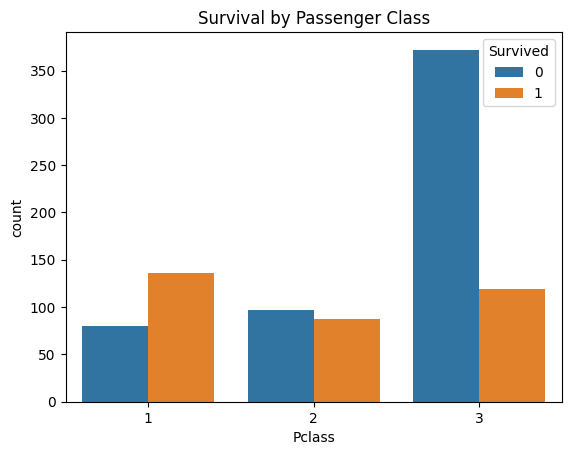

In [10]:
# 3. Survival vs Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

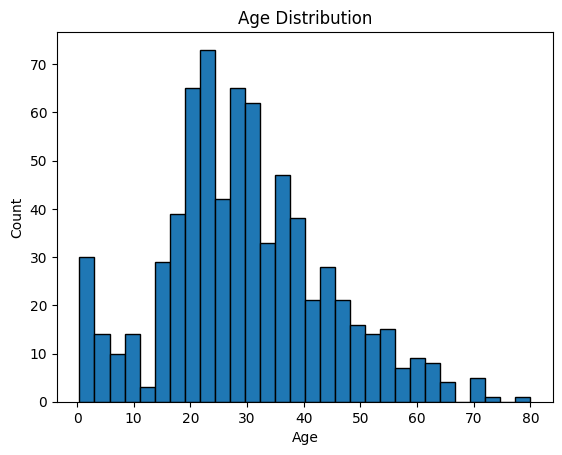

In [11]:
# 4. Age distribution
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)

In [17]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,STON/O 2. 3101280,7.925,NaN,S,0
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,NaN,S,0
768,769,0,3,"Moran, Mr. Daniel J",male,28.0,1,0,371110,24.150,NaN,Q,0
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.000,NaN,S,0
723,724,0,2,"Hodges, Mr. Henry Price",male,50.0,0,0,250643,13.000,NaN,S,0


In [18]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [20]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Fare'], axis=1, inplace=True)

In [21]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,HasCabin,FamilySize
0,0,3,male,22.0,S,0,2
1,1,1,female,38.0,C,1,2
2,1,3,female,26.0,S,0,1
3,1,1,female,35.0,S,1,2
4,0,3,male,35.0,S,0,1


#encoding sex

In [22]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [23]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,HasCabin,FamilySize
0,0,3,0,22.0,S,0,2
1,1,1,1,38.0,C,1,2
2,1,3,1,26.0,S,0,1
3,1,1,1,35.0,S,1,2
4,0,3,0,35.0,S,0,1


In [24]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [25]:
df.head()

,Survived,Pclass,Sex,Age,HasCabin,FamilySize,Embarked_Q,Embarked_S
0,0,3,0,22.0,0,2,False,True
1,1,1,1,38.0,1,2,False,False
2,1,3,1,26.0,0,1,False,True
3,1,1,1,35.0,1,2,False,True
4,0,3,0,35.0,0,1,False,True


In [26]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [27]:
X.head()

,Pclass,Sex,Age,HasCabin,FamilySize,Embarked_Q,Embarked_S
0,3,0,22.0,0,2,False,True
1,1,1,38.0,1,2,False,False
2,3,1,26.0,0,1,False,True
3,1,1,35.0,1,2,False,True
4,3,0,35.0,0,1,False,True


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    

In [30]:
# 1. Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

In [31]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))

Logistic Regression Accuracy: 0.8212290502793296
[[91 14]
 [18 56]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [32]:
# 2. Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [33]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.8100558659217877
[[90 15]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [34]:
# 3. Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [35]:
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.6089385474860335
[[104   1]
 [ 69   5]]
              precision    recall  f1-score   support

           0       0.60      0.99      0.75       105
           1       0.83      0.07      0.12        74

    accuracy                           0.61       179
   macro avg       0.72      0.53      0.44       179
weighted avg       0.70      0.61      0.49       179



In [36]:
# 4. Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

In [37]:
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_pred))
print(confusion_matrix(y_test, tree_pred))
print(classification_report(y_test, tree_pred))

Decision Tree Accuracy: 0.7541899441340782
[[86 19]
 [25 49]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       105
           1       0.72      0.66      0.69        74

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179

